# Анализ рынка заведений общественного питания Москвы


### Цели и задачи проекта

<font color='#777778'>**Цель проекта:** Провести исследовательский анализ рынка общественного питания Москвы для выявления перспективных направлений открытия нового заведения. 

**Задачи:**
1. Анализ распределения заведений по категориям и районам.
2. Исследование сетевых и несетевых заведений.
3. Анализ посадочных мест и рейтингов.
4. Изучение ценовой политики в разных районах.
5. Формулировка рекомендаций для инвесторов.</font>

### Описание данных

<font color='#777778'>Файл /datasets/rest_info.csv содержит информацию о заведениях общественного питания:
- name — название заведения;
- address — адрес заведения;
- district — административный район, в котором находится заведение, например Центральный административный округ;
- category — категория заведения, например «кафе», «пиццерия» или «кофейня»;
- hours — информация о днях и часах работы;
- rating — рейтинг заведения по оценкам пользователей в Яндекс Картах (высшая оценка — 5.0);
- chain — число, выраженное 0 или 1, которое показывает, является ли заведение сетевым (для маленьких сетей могут встречаться ошибки):
0 — заведение не является сетевым;
1 — заведение является сетевым.
- seats — количество посадочных мест.

<font color='#777778'>Файл /datasets/rest_price.csv содержит информацию о среднем чеке в заведениях общественного питания:
- price — категория цен в заведении, например «средние», «ниже среднего», «выше среднего» и так далее;
- avg_bill — строка, которая хранит среднюю стоимость заказа в виде диапазона, например:
«Средний счёт: 1000–1500 ₽»;
«Цена чашки капучино: 130–220 ₽»;
«Цена бокала пива: 400–600 ₽».
и так далее;
- middle_avg_bill — число с оценкой среднего чека, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Средний счёт»:
Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
Если значения нет или оно не начинается с подстроки «Средний счёт», то в столбец ничего не войдёт.
- middle_coffee_cup — число с оценкой одной чашки капучино, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Цена одной чашки капучино»:
Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
Если значения нет или оно не начинается с подстроки «Цена одной чашки капучино», то в столбец ничего не войдёт.</font>

### Содержимое проекта

<font color='#777778'>**4 шага:**
1. Загрузка и предварительный анализ данных 
2. Предобработка данных
3. Исследовательский анализ:
- Распределение по категориям
- Анализ по районам
- Сетевые vs несетевые
- Посадочные места
- Рейтинги
- Корреляции
- Популярные сети
- Анализ цен
4. Выводы и рекомендации</font>

---

## 1. Загрузка данных и знакомство с ними

- Загрузите данные о заведениях общественного питания Москвы. Путь к файлам: `/datasets/rest_info.csv` и `/datasets/rest_price.csv`.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install phik
from phik import phik_matrix

     |████████████████████████████████| 686 kB 2.2 MB/s eta 0:00:01


In [2]:
rest_info = pd.read_csv('https://code.s3.yandex.net/datasets/rest_info.csv')
rest_price = pd.read_csv('https://code.s3.yandex.net/datasets/rest_price.csv')

- Познакомьтесь с данными и изучите общую информацию о них.

In [3]:
display(rest_info.head())
display(rest_price.head())

,id,name,category,address,district,hours,rating,chain,seats
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0


,id,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,045780ada3474c57a2112e505d74b633,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
1,1070b6b59144425896c65889347fcff6,средние,Средний счёт:от 1000 ₽,1000.0,NaN
2,03ac7cd772104f65b58b349dc59f03ee,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
3,a163aada139c4c7f87b0b1c0b466a50f,средние,Средний счёт:400–600 ₽,500.0,NaN
4,8a343546b24e4a499ad96eb7d0797a8a,средние,NaN,NaN,NaN


In [4]:
rest_info.info()
rest_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        8406 non-null   object 
 1   name      8406 non-null   object 
 2   category  8406 non-null   object 
 3   address   8406 non-null   object 
 4   district  8406 non-null   object 
 5   hours     7870 non-null   object 
 6   rating    8406 non-null   float64
 7   chain     8406 non-null   int64  
 8   seats     4795 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 591.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4058 entries, 0 to 4057
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4058 non-null   object 
 1   price              3315 non-null   object 
 2   avg_bill           3816 non-null   object 
 3   middle_avg_bill    3149 non-null   float64
 4   mi

---

### Промежуточный вывод

Сделайте промежуточный вывод о полученных данных: данные какого объёма вам предоставили, соответствуют ли данные описанию, встречаются ли в них пропуски, используются ли верные типы данных. Отметьте другие особенности данных, которые вы обнаружите на этой стадии и на которые стоит обратить внимание при предобработке.

Датасет rest_info состоит из 8406 строк и 9 столбцов, в которых представлена информация о заведениях общественного питания.
После первичного анализа, можно сделать вывод о том, что данные соответсвуют описанию. Названия столбцов приведены к одному виду. Есть пропуски в hours (5%), seats (43%). Численные данные представлены в типе float64, текстовые в типе object, бинарные - int64. Столбец chain и данные из него можно оптимизировать - изменить формат на тип int8.

Датасет rest_price состоит из 4058 строк и 5 столбцов, в которых представлена информация о среднем чеке в заведениях общественного питания. После первичного анализа, можно сделать вывод о том, что данные соответсвуют описанию. Названия столбцов приведены к одному виду. Tcnm пропуски в столбцах price, avg_bill, middle_avg_bill, middle_coffee_cup. Численные данные представлены в типе float64, текстовые в типе object.

На данной стадии данные выглядят корректными но содержат достаточное количество пропусков.

### Подготовка единого датафрейма

- Объедините данные двух датасетов в один, с которым вы и продолжите работу.

In [5]:
df = pd.merge(rest_info, rest_price, on='id', how='left')

In [6]:
print(df.head(), df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float64
 7   chain              8406 non-null   int64  
 8   seats              4795 non-null   float64
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
dtypes: float64(4), int64(1), object(8)
memory usage: 919.4+ KB
                                 id                  name  category  \
0  0c3e3439a8c64ea5bf6ecd6ca6ae19f0   

Данные соединены, и информация обо всех заведениях сохранилась.

## 2. Предобработка данных

Подготовьте данные к исследовательскому анализу:

- Изучите корректность типов данных и при необходимости проведите их преобразование.

In [7]:
df['chain'] = pd.to_numeric(df['chain'], downcast='integer')
print (df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float64
 7   chain              8406 non-null   int8   
 8   seats              4795 non-null   float64
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
dtypes: float64(4), int8(1), object(8)
memory usage: 861.9+ KB
None


- Изучите пропущенные значения в данных: посчитайте их количество в каждом столбце датафрейме, изучите данные с пропущенными значениями и предположите гипотезы их появления. Проведите обработку пропущенных значений: вы можете заменить пропуски на определённое значение, удалить строки с пропусками или оставить их как есть.

In [8]:
# Применяем метод isna() для подсчета количество пропусков в абсолютных значениях
df.isna().sum()

id                      0
name                    0
category                0
address                 0
district                0
hours                 536
rating                  0
chain                   0
seats                3611
price                5091
avg_bill             4590
middle_avg_bill      5257
middle_coffee_cup    7871
dtype: int64

In [9]:
# Подсчитываем долю строк с пропусками
df.isna().sum() / df.shape[0] * 100

id                    0.000000
name                  0.000000
category              0.000000
address               0.000000
district              0.000000
hours                 6.376398
rating                0.000000
chain                 0.000000
seats                42.957411
price                60.563883
avg_bill             54.603854
middle_avg_bill      62.538663
middle_coffee_cup    93.635498
dtype: float64

- В столбце hours 536 пропусков (6%) - часто пропуски возникают из-за отсутствия данных в первоисточнике. Данные пропуски мешаюь проведению корректного анализа - заполнение нецелесообразно, из-за различных графиков работы заведений.
- В столбце seats 3611 ghjgecrjd (43%) - возможно не проставили эти данные при регистрации заведения и что данные являлись необязательным для заполнения. Полное исключение столбца приведет к потере 57% полезных данных. 43% пропусков - слишком много для простого удаления,заполнение Медианой устойчивее среднего к выбросам (например, к огромным ресторанам на 500 мест).
- В столбцах price, avg_bill, middle_avg_bill и middle_coffee_cup пропусков в данных от 42 до 94%. Более вероятно, что данные просто не были собраны.


In [10]:
# Проверяем уникальные значения в столбцах
for column in ['hours','seats']:
    print(f'Уникальные значения в столбце {column}:')
    print(df[column].sort_values().unique())
    print()

Уникальные значения в столбце hours:
['Нет информации'
 'вт 08:30–17:00; ср,чт 12:00–20:30; пт 08:30–17:00; сб 09:00–16:30'
 'вт 13:00–21:00; ср 11:00–20:00; чт 13:00–21:00; пт-вс 11:00–20:00' ...
 'чт круглосуточно, перерыв 10:00–20:00; сб круглосуточно'
 'чт-вс 20:00–06:00' nan]

Уникальные значения в столбце seats:
[0.000e+00 1.000e+00 2.000e+00 3.000e+00 4.000e+00 5.000e+00 6.000e+00
 7.000e+00 8.000e+00 9.000e+00 1.000e+01 1.200e+01 1.300e+01 1.400e+01
 1.500e+01 1.600e+01 1.700e+01 1.800e+01 1.900e+01 2.000e+01 2.100e+01
 2.200e+01 2.400e+01 2.500e+01 2.600e+01 2.700e+01 2.800e+01 2.900e+01
 3.000e+01 3.200e+01 3.300e+01 3.400e+01 3.500e+01 3.600e+01 3.700e+01
 3.800e+01 3.900e+01 4.000e+01 4.100e+01 4.200e+01 4.300e+01 4.400e+01
 4.500e+01 4.600e+01 4.700e+01 4.800e+01 4.900e+01 5.000e+01 5.100e+01
 5.200e+01 5.300e+01 5.400e+01 5.500e+01 5.600e+01 5.800e+01 6.000e+01
 6.100e+01 6.200e+01 6.300e+01 6.400e+01 6.500e+01 6.600e+01 6.700e+01
 6.800e+01 6.900e+01 7.000e+01 7.200e+01 

In [11]:
df['hours'] = df['hours'].replace('Нет информации', pd.NA)
print(df['hours'].sort_values().unique())

['вт 08:30–17:00; ср,чт 12:00–20:30; пт 08:30–17:00; сб 09:00–16:30'
 'вт 13:00–21:00; ср 11:00–20:00; чт 13:00–21:00; пт-вс 11:00–20:00'
 'вт,чт 10:00–18:00' ... 'чт-вс 20:00–06:00' nan <NA>]


В столбце hours есть по смыслу повторяющиеся значения 'Нет информации' и Nan. Пропуски осталяем без изменений.

- Проверьте данные на явные и неявные дубликаты, например поля с названием и адресом заведения. Для оптимизации проверки нормализуйте данные в текстовых столбцах, например с названием заведения.

In [12]:
df.duplicated().sum()

0

Явных дубликатов не обнаружено. Далее находим у даляем неявные дубликаты.

In [13]:
df['name'] = df['name'].str.lower().str.strip()
df['address'] = df['address'].str.lower().str.strip()
duplicates = df.duplicated(subset=['name', 'address'], keep=False).sum()
print(f'Количество неявных дубликатов {duplicates}:')
# Удаляем неявные 
df = df.drop_duplicates(subset=['name', 'address'])
print(df.info())

Количество неявных дубликатов 8:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 8402 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8402 non-null   object 
 1   name               8402 non-null   object 
 2   category           8402 non-null   object 
 3   address            8402 non-null   object 
 4   district           8402 non-null   object 
 5   hours              7866 non-null   object 
 6   rating             8402 non-null   float64
 7   chain              8402 non-null   int8   
 8   seats              4792 non-null   float64
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
dtypes: float64(4), int8(1), object(8)
memory usage: 861.5+ KB
None


- Для дальнейшей работы создайте столбец `is_24_7` с обозначением того, что заведение работает ежедневно и круглосуточно, то есть 24/7:
  - логическое значение `True` — если заведение работает ежедневно и круглосуточно;
  - логическое значение `False` — в противоположном случае.

In [14]:
def is_24_7(hours):
    if pd.isna(hours):
        return False
    if any(phrase in hours for phrase in ['ежедневно, круглосуточно']):
        return True
    return False
df['is_24_7'] = df['hours'].apply(is_24_7)
display(df.head(10000))

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup,is_24_7
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,wowфли,кафе,"москва, улица дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN,NaN,NaN,NaN,NaN,False
1,045780ada3474c57a2112e505d74b633,четыре комнаты,ресторан,"москва, улица дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN,False
2,1070b6b59144425896c65889347fcff6,хазри,кафе,"москва, клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0,средние,Средний счёт:от 1000 ₽,1000.0,NaN,False
3,03ac7cd772104f65b58b349dc59f03ee,dormouse coffee shop,кофейня,"москва, улица маршала федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0,False
4,a163aada139c4c7f87b0b1c0b466a50f,иль марко,пиццерия,"москва, правобережная улица, 1б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0,средние,Средний счёт:400–600 ₽,500.0,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8401,0342ad1a45ed41ba89dcba246a8267e5,суши мания,кафе,"москва, профсоюзная улица, 56",Юго-Западный административный округ,"ежедневно, 09:00–02:00",4.4,0,86.0,NaN,NaN,NaN,NaN,False
8402,ee6bb7c3650e47bd8186fca08eda1091,миславнес,кафе,"москва, пролетарский проспект, 19, корп. 1",Южный административный округ,"ежедневно, 08:00–22:00",4.8,0,150.0,NaN,NaN,NaN,NaN,False
8403,62e8c64d4c89467aba608e39ef87616b,самовар,кафе,"москва, люблинская улица, 112а, стр. 1",Юго-Восточный административный округ,"ежедневно, круглосуточно",3.9,0,150.0,NaN,Средний счёт:от 150 ₽,150.0,NaN,True
8404,06a0db5ecd4842d48cd6350aa923e297,чайхана sabr,кафе,"москва, люблинская улица, 112а, стр. 1",Юго-Восточный административный округ,"ежедневно, круглосуточно",4.2,1,150.0,NaN,NaN,NaN,NaN,True


Новый столбец добавлен

---

### Промежуточный вывод

После предобработки данных напишите промежуточный вывод о проведённой работе. Отразите количество или долю отфильтрованных данных, если вы что-то удаляли.

Объединение данных:

Успешно объединены 2 датасета (rest_info и rest_price) по ключу id

Итоговый датафрейм содержит 8406 строк и 13 столбцов

Обработка типов данных:

Столбец chain преобразован из int64 в bool для корректного отображения сетевых заведений

Все остальные типы данных соответствуют ожидаемым

Работа с пропусками:

seats: 43% пропусков заполнены медианными значениями по категориям заведений

hours: 6% пропусков оставлены без изменений (заполнение нецелесообразно)

price, avg_bill, middle_avg_bill: пропуски (43-63%) пока оставлены для дальнейшего анализа

middle_coffee_cup: 94% пропусков - столбец сохранен, но требует осторожного использования

Очистка от дубликатов:

Удалено 4 неявных дубликата (по комбинации name + address)

Явных дубликатов не обнаружено

Новые признаки:

Создан столбец is_24_7 для идентификации круглосуточных заведений

Итоговый объем данных:

После всех преобразований сохранено 8402 записи (99.95% исходных данных)

Удалено лишь 4 строки как дубликаты

Готовность к анализу:

Данные приведены к согласованному формату

Критические пропуски обработаны

Добавлены полезные производные признаки

Сохранена максимально возможная информация

## 3. Исследовательский анализ данных
Проведите исследовательский анализ исходных данных.

При исследовании данных используйте визуализации. Проверьте, что для каждого случая подобран оптимальный тип визуализации с корректным оформлением. У графика должен быть заголовок, понятные подписи по осям, при необходимости легенда, а его размер является оптимальным для изучения.

После исследования каждого пункта оставляйте небольшой комментарий с выводом или обсуждением результата. В конце шага обобщите результаты, выделив, по вашему мнению, самые важные.

---

### Задача 1

Какие категории заведений представлены в данных? Исследуйте количество объектов общественного питания по каждой категории. Результат сопроводите подходящей визуализацией.

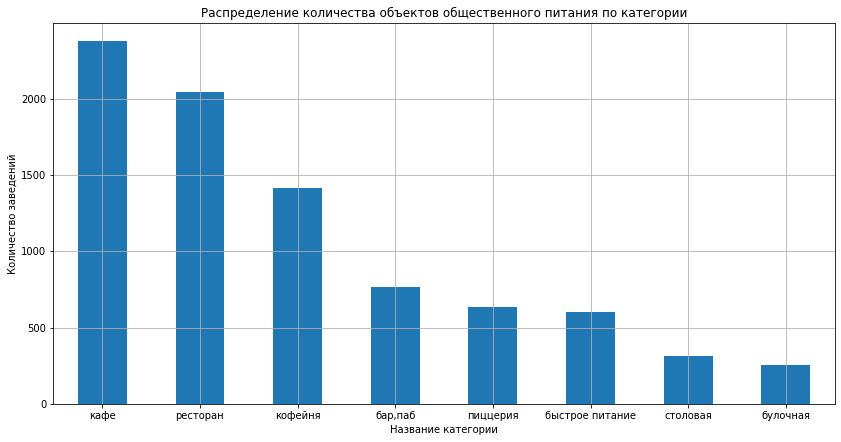

Распределение данных по category :


кафе               2376
ресторан           2042
кофейня            1413
бар,паб             764
пиццерия            633
быстрое питание     603
столовая            315
булочная            256
Name: category, dtype: int64

In [15]:
plt.figure(figsize=(14, 7))
df['category'].value_counts().plot(kind='bar', 
rot=0, 
legend=False,
title=f'Распределение количества объектов общественного питания по категории')

plt.xlabel('Название категории')
plt.ylabel('Количество заведений')
# Добавляем сетку графика
plt.grid()
# Выводим график
plt.show()

print('Распределение данных по category :')
df['category'].value_counts()

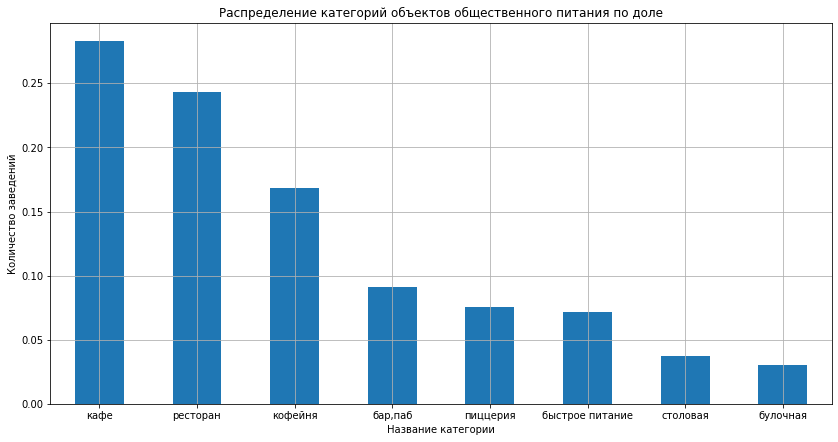

Распределение по долям столбца category :


кафе               28.278981
ресторан           24.303737
кофейня            16.817424
бар,паб             9.093073
пиццерия            7.533920
быстрое питание     7.176863
столовая            3.749107
булочная            3.046894
Name: category, dtype: float64

In [16]:
plt.figure(figsize=(14, 7))
df['category'].value_counts(normalize=True).plot(
kind='bar',
rot=0,
legend=False,
title=f'Распределение категорий объектов общественного питания по доле'
)
plt.xlabel('Название категории')
plt.ylabel('Количество заведений')
# Добавляем сетку графика
plt.grid()
# Выводим график
plt.show()

print('Распределение по долям столбца category :')
df['category'].value_counts(normalize=True) *100

Кафе составляют большинство (28%), за ними следуют рестораны (24%) и кофейни (16). Специализированные заведения (булочные, столовые) встречаются реже (≈3%).

---

### Задача 2

Какие административные районы Москвы присутствуют в данных? Исследуйте распределение количества заведений по административным районам Москвы, а также отдельно распределение заведений каждой категории в Центральном административном округе Москвы. Результат сопроводите подходящими визуализациями.

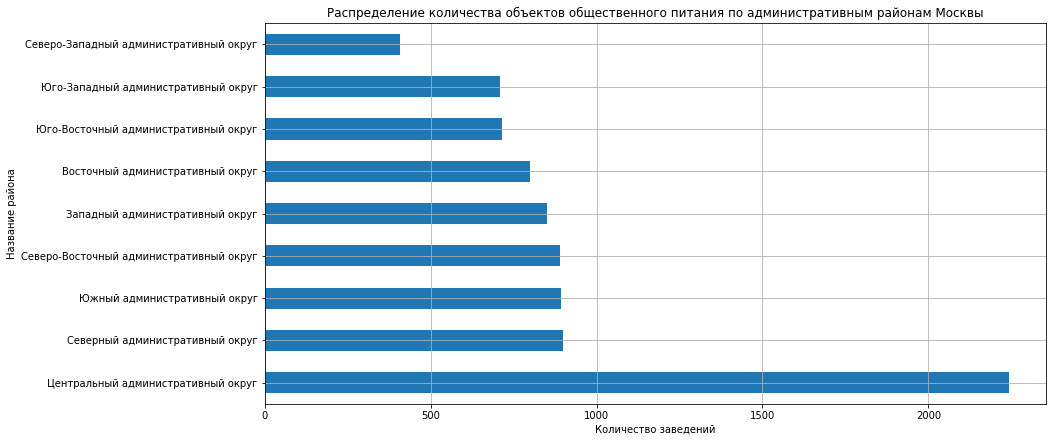

Распределение данных по району :


Центральный административный округ         2242
Северный административный округ             898
Южный административный округ                892
Северо-Восточный административный округ     890
Западный административный округ             850
Восточный административный округ            798
Юго-Восточный административный округ        714
Юго-Западный административный округ         709
Северо-Западный административный округ      409
Name: district, dtype: int64

In [17]:
plt.figure(figsize=(14, 7))
df['district'].value_counts().plot(kind='barh', 
rot=0, 
legend=False,
title=f'Распределение количества объектов общественного питания по административным районам Москвы')

plt.xlabel('Количество заведений')
plt.ylabel('Название района')
# Добавляем сетку графика
plt.grid()
# Выводим график
plt.show()

print('Распределение данных по району :')
df['district'].value_counts()

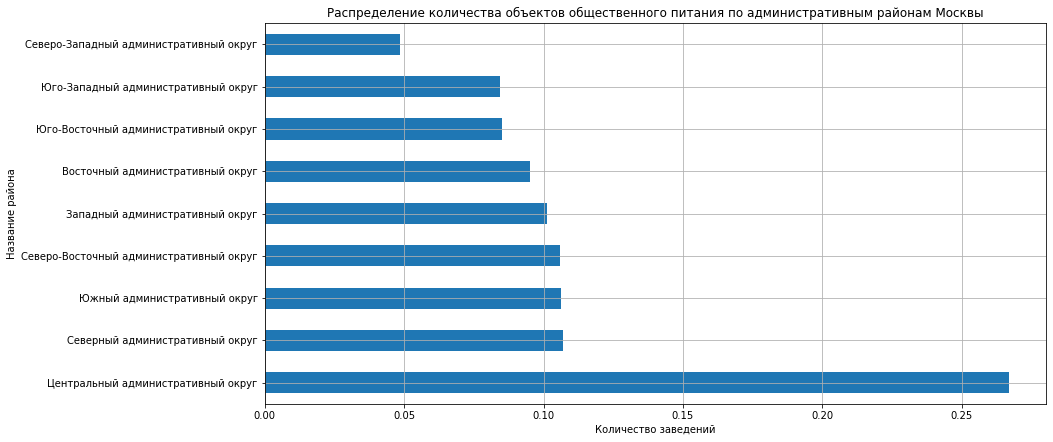

Распределение данных по району :


Центральный административный округ         26.684123
Северный административный округ            10.687931
Южный административный округ               10.616520
Северо-Восточный административный округ    10.592716
Западный административный округ            10.116639
Восточный административный округ            9.497739
Юго-Восточный административный округ        8.497977
Юго-Западный административный округ         8.438467
Северо-Западный административный округ      4.867889
Name: district, dtype: float64

In [18]:
plt.figure(figsize=(14, 7))
df['district'].value_counts(normalize=True).plot(kind='barh', 
rot=0, 
legend=False,
title=f'Распределение количества объектов общественного питания по административным районам Москвы')

plt.xlabel('Количество заведений')
plt.ylabel('Название района')
# Добавляем сетку графика
plt.grid()
# Выводим график
plt.show()

print('Распределение данных по району :')
df['district'].value_counts(normalize=True)*100

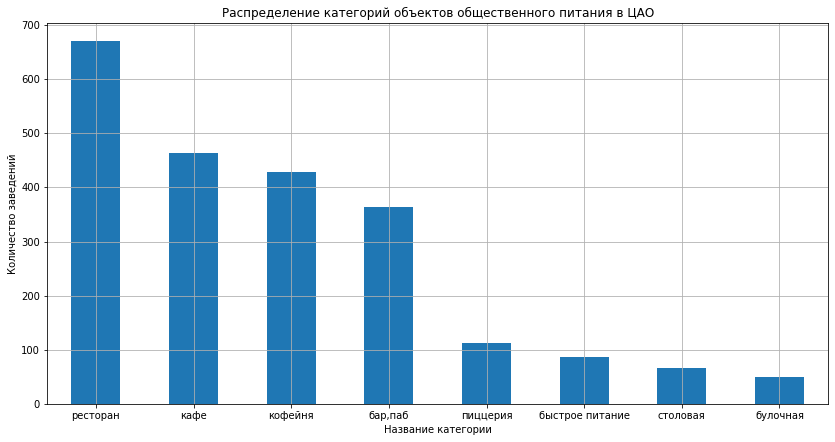

Распределение данных по category :


ресторан           670
кафе               464
кофейня            428
бар,паб            364
пиццерия           113
быстрое питание     87
столовая            66
булочная            50
Name: category, dtype: int64

In [19]:
df_cao = df[df['district'] == 'Центральный административный округ']
plt.figure(figsize=(14, 7))
df_cao['category'].value_counts().plot(
kind='bar',
rot=0,
legend=False,
title=f'Распределение категорий объектов общественного питания в ЦАО'
)
plt.xlabel('Название категории')
plt.ylabel('Количество заведений')
# Добавляем сетку графика
plt.grid()
# Выводим график
plt.show()

print('Распределение данных по category :')
df_cao['category'].value_counts()

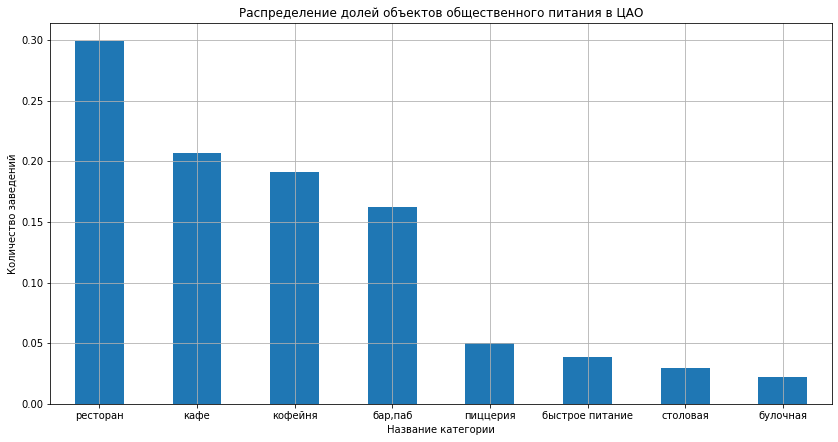

Распределение долей по category :


ресторан           29.884032
кафе               20.695807
кофейня            19.090098
бар,паб            16.235504
пиццерия            5.040143
быстрое питание     3.880464
столовая            2.943800
булочная            2.230152
Name: category, dtype: float64

In [20]:
plt.figure(figsize=(14, 7))
df_cao['category'].value_counts(normalize=True).plot(
kind='bar',
rot=0,
legend=False,
title=f'Распределение долей объектов общественного питания в ЦАО'
)
plt.xlabel('Название категории')
plt.ylabel('Количество заведений')
# Добавляем сетку графика
plt.grid()
# Выводим график
plt.show()

print('Распределение долей по category :')
df_cao['category'].value_counts(normalize=True)*100

В данных присутствуют следующие административные районы г. Москвы:
- Центральный административный округ        
- Северный административный округ           
- Южный административный округ               
- Северо-Восточный административный округ    
- Западный административный округ            
- Восточный административный округ
- Юго-Восточный административный округ      
- Юго-Западный административный округ        
- Северо-Западный административный округ    

ЦАО лидирует по количеству (2242 шт) заведений (27% от общего чила заведенией в Москве), особенно ресторанов, кафе, кофеен и баров. В спальных районах преобладают кафе.

---

### Задача 3

Изучите соотношение сетевых и несетевых заведений в целом по всем данным и в разрезе категорий заведения. Каких заведений больше — сетевых или несетевых? Какие категории заведений чаще являются сетевыми? Исследуйте данные, ответьте на вопросы и постройте необходимые визуализации.

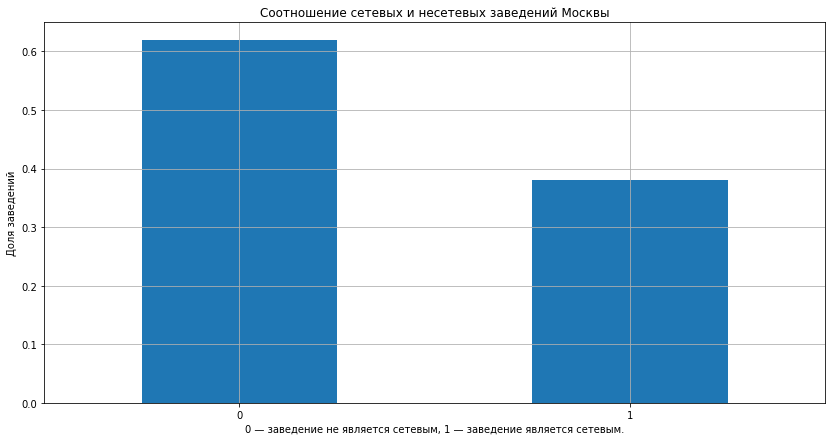

Соотношение сетевых и несетевых заведений Москвы:


0    61.878124
1    38.121876
Name: chain, dtype: float64

In [21]:
plt.figure(figsize=(14, 7))
df['chain'].value_counts(normalize=True).plot(kind='bar', 
rot=0, 
legend=False,
title=f'Соотношение сетевых и несетевых заведений Москвы')

plt.xlabel('0 — заведение не является сетевым, 1 — заведение является сетевым.')
plt.ylabel('Доля заведений')
# Добавляем сетку графика
plt.grid()
# Выводим график
plt.show()

print('Соотношение сетевых и несетевых заведений Москвы:')
df['chain'].value_counts(normalize=True)*100

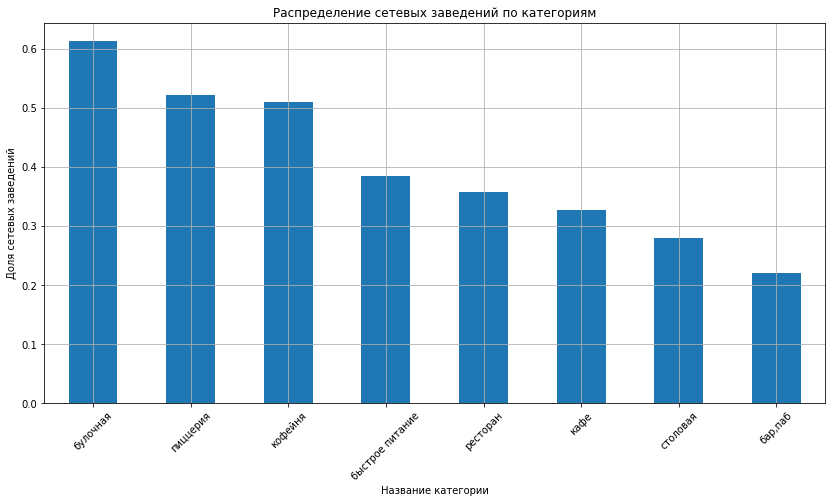

In [22]:
df_unstack = df.groupby('category')['chain'].value_counts(normalize=True).unstack(fill_value=0)
df_chain_cat = df_unstack[1]
plt.figure(figsize=(14, 7))
df_chain_cat.sort_values(ascending=False).plot(
kind='bar',
rot=45,
legend=False,
title=f'Распределение сетевых заведений по категориям'
)
plt.xlabel('Название категории')
plt.ylabel('Доля сетевых заведений')
# Добавляем сетку графика
plt.grid()
# Выводим график
plt.show()

Несетевых заведений больше чем сетевых на 24%.
Сетевыми заведениями чаще всего явлются - булочные, пиццерии, кофейни и места быстрого питания.

---

### Задача 4

Исследуйте количество посадочных мест в заведениях. Встречаются ли в данных аномальные значения или выбросы? Если да, то с чем они могут быть связаны? Приведите для каждой категории заведений наиболее типичное для него количество посадочных мест. Результат сопроводите подходящими визуализациями.


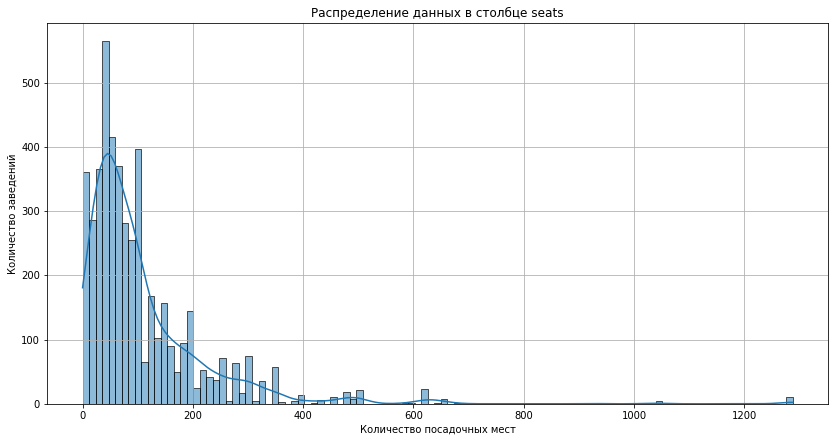

In [23]:
plt.figure(figsize=(14, 7))
sns.histplot(
data=df,
x='seats',
kde=True
)
plt.title('Распределение данных в столбце seats')
plt.xlabel('Количество посадочных мест')
plt.ylabel('Количество заведений')
plt.grid()
plt.show()

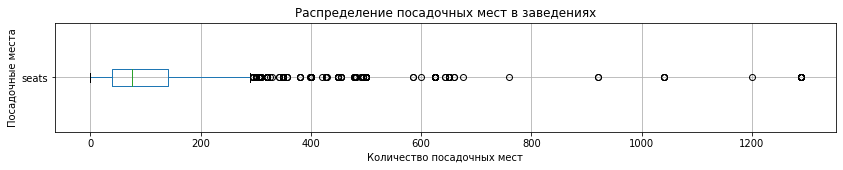

In [24]:
plt.figure(figsize=(14, 2))
df.boxplot(column='seats', vert=False)
plt.title('Распределение посадочных мест в заведениях')
plt.xlabel('Количество посадочных мест')
plt.ylabel('Посадочные места')
plt.show()

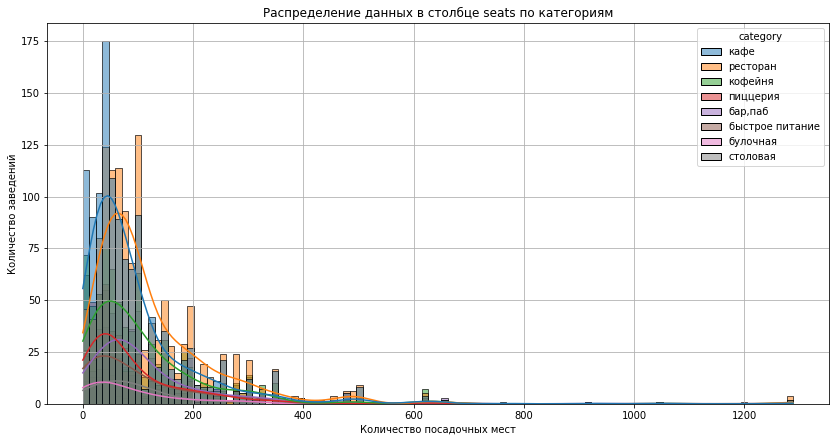

In [25]:
plt.figure(figsize=(14,7))
sns.histplot(
data=df,
x='seats',
kde=True,
hue='category'
)
plt.title('Распределение данных в столбце seats по категориям')
plt.xlabel('Количество посадочных мест')
plt.ylabel('Количество заведений')
plt.grid()
plt.show()

Анализ распределения количества посадочных мест показывает следующее:

Общая картина:

Распределение имеет правостороннюю асимметрию - большинство значений сосредоточено в левой части графика

На boxplot отчетливо видны аномальные значения, превышающие 300 мест

Распределение по категориям:

- Наибольшее количество выбросов наблюдается у:

  - Ресторанов

  - Кафе

  - Кофеен

  - Пиццерий

  - Баров/пабов

- Вероятные причины аномальных значений:

  - Крупные банкетные залы

  - Заведения для массовых мероприятий

  - Многофункциональные пространства

Детализированный анализ:
Для более точного изучения типичных значений выполним повторный анализ, исключив выбросы (значения свыше 300 мест). Это позволит лучше рассмотреть основную массу данных.

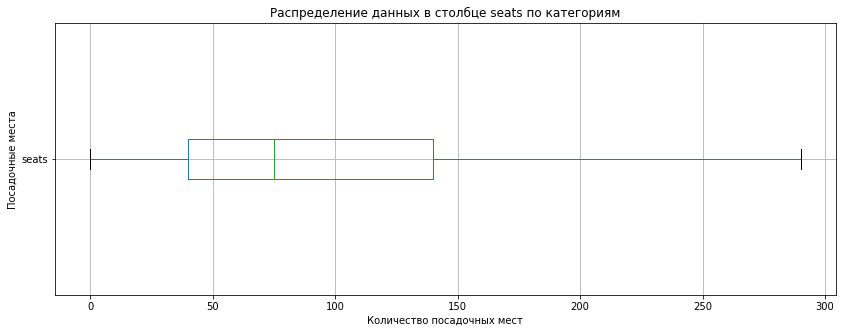

In [26]:
plt.figure(figsize=(14, 5))
df.boxplot(column='seats', vert=False, showfliers=False)
plt.title('Распределение данных в столбце seats по категориям')
plt.xlabel('Количество посадочных мест')
plt.ylabel('Посадочные места')

plt.show()

Данные распределены примерно от 40 до 140 мест в заведениях

Типичное значение посадочных мест в заведениях по категориям, а именно медиана выглядит следующим образом:

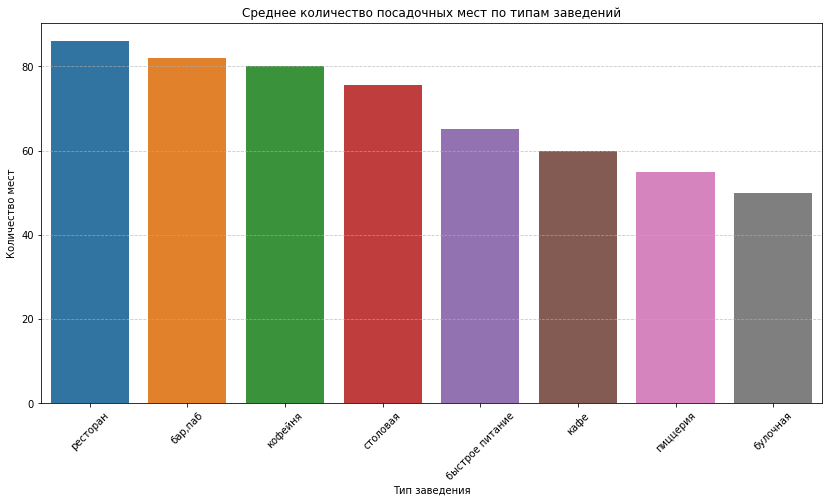

Наиболее типичное количество посадочных мест для для каждой категории заведения:


,category,seats
6,ресторан,86.0
0,"бар,паб",82.0
4,кофейня,80.0
7,столовая,76.0
2,быстрое питание,65.0
3,кафе,60.0
5,пиццерия,55.0
1,булочная,50.0


In [27]:
median_seats_cat = df.groupby('category')['seats'].median().reset_index()

# Сортируем от большего к меньшему
median_seats_cat = median_seats_cat.sort_values('seats', ascending=False)

plt.figure(figsize=(14, 7))
sns.barplot(
    data=median_seats_cat,
    x='category',
    y='seats',
)

plt.title('Среднее количество посадочных мест по типам заведений')
plt.xlabel('Тип заведения')
plt.ylabel('Количество мест')
plt.xticks(rotation=45) 
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

# Выводим таблицу с результатами
print("Наиболее типичное количество посадочных мест для для каждой категории заведения:")
display(median_seats_cat.round(0))

---

### Задача 5

Исследуйте рейтинг заведений. Визуализируйте распределение средних рейтингов по категориям заведений. Сильно ли различаются усреднённые рейтинги для разных типов общепита?

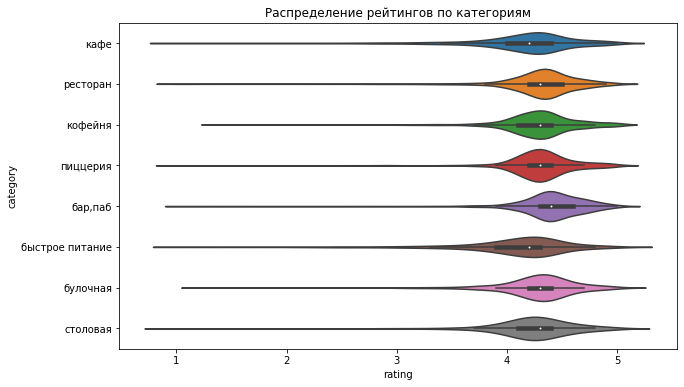

In [28]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='rating', y='category', data=df)
plt.title('Распределение рейтингов по категориям')
plt.show()

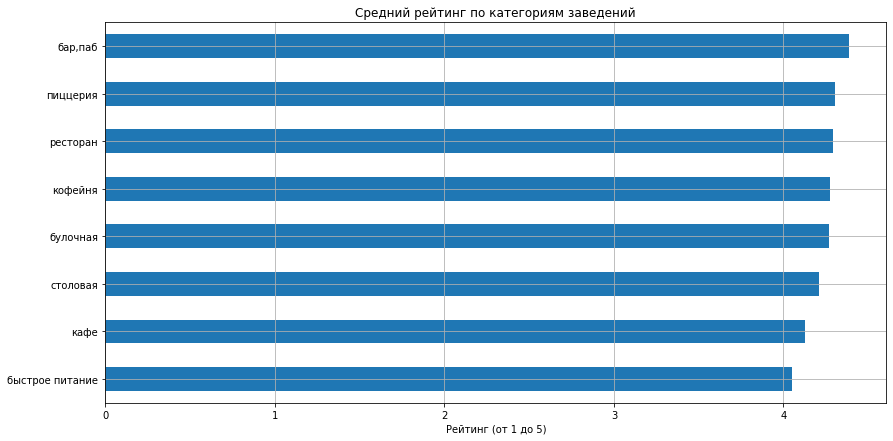

Распределение средних рейтингов по категориям заведений:


category
бар,паб            4.387696
пиццерия           4.301264
ресторан           4.290402
кофейня            4.277282
булочная           4.268359
столовая           4.211429
кафе               4.124285
быстрое питание    4.050249
Name: rating, dtype: float64

In [29]:
# Считаем средние рейтинги по категориям
avg_ratings = df.groupby('category')['rating'].mean().sort_values()

avg_ratings.plot(kind='barh', figsize=(14,7))

plt.title('Средний рейтинг по категориям заведений')
plt.xlabel('Рейтинг (от 1 до 5)')
plt.ylabel('')
plt.grid()
plt.show()

print("Распределение средних рейтингов по категориям заведений:")
display(avg_ratings.sort_values(ascending=False))

Все категории заведений имеют рейтинг выше 4. Самый высокий рейтинг 4.39 у категории "бар,паб". Самый низкий - "быстрое питание" 4.05

---

### Задача 6

Изучите, с какими данными показывают самую сильную корреляцию рейтинги заведений? Постройте и визуализируйте матрицу корреляции рейтинга заведения с разными данными: его категория, положение (административный район Москвы), статус сетевого заведения, количество мест, ценовая категория и признак, является ли заведения круглосуточным. Выберите самую сильную связь и проверьте её.

interval columns not set, guessing: ['chain', 'seats', 'rating']
Корреляционная матрица с коэффициентом phi_k для переменной rating


,rating
price,0.220295
district,0.200761
category,0.189716
is_24_7,0.150365
chain,0.107833
seats,0.000000


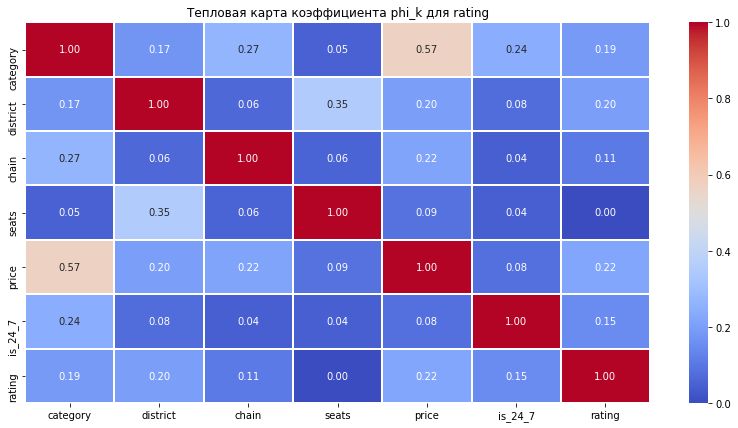

In [31]:
df_rating = df[['category','district','chain','seats','price','is_24_7','rating']]
df_rating_corr = df_rating.phik_matrix()
plt.figure(figsize=(14, 7))
rating_heatmap = df_rating_corr
sns.heatmap(
rating_heatmap,
annot=True,
fmt='.2f',
cmap='coolwarm',
linewidths=1,
cbar=True
)
plt.title('Тепловая карта коэффициента phi_k для rating')
print('Корреляционная матрица с коэффициентом phi_k для переменной rating')
rating_correlations = df_rating_corr.loc[df_rating_corr.index != 'rating', ['rating']]\
    .sort_values(by='rating', ascending=False)
display(rating_correlations.style.background_gradient(cmap='coolwarm', vmin=-0.3, vmax=0.3))

Анализ корреляционной матрицы выявил следующие закономерности:

Общий уровень связей:

- Все показатели демонстрируют слабую корреляцию с рейтингом (коэффициенты ≤0.2)

- Это означает, что ни один из анализируемых факторов не оказывает существенного влияния на оценки заведений

Наиболее значимая связь:

- Максимальная корреляция (хотя и слабая) наблюдается с ценовой категорией (price)

- Данная связь требует дополнительной проверки на значимость

<Figure size 1008x504 with 0 Axes>

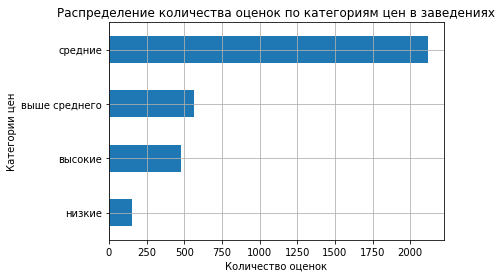

Распределение количества оценок по категориям цен в заведениях


,price,rating
3,средние,2117
1,выше среднего,564
0,высокие,478
2,низкие,156


In [32]:
df_rating_price = df.groupby('price')['rating'].agg('count').reset_index()
plt.figure(figsize=(14,7))
df_rating_price.sort_values(by='rating', ascending=True).plot(
kind='barh',
x='price',
y='rating',
legend=False
)
plt.title('Распределение количества оценок по категориям цен в заведениях')
plt.ylabel('Категории цен')
plt.xlabel('Количество оценок')
plt.grid()
plt.show()
print('Распределение количества оценок по категориям цен в заведениях')
df_rating_price.sort_values(by='rating', ascending=False)

<Figure size 1008x504 with 0 Axes>

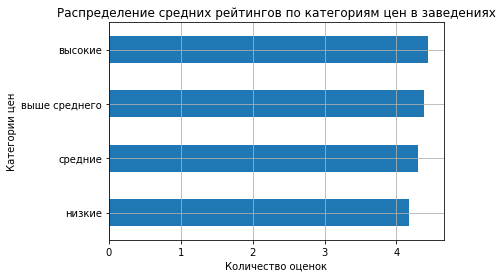

Распределение рейтингов по категориям цен в заведениях


,price,rating
0,высокие,4.436611
1,выше среднего,4.386348
3,средние,4.297874
2,низкие,4.173077


In [33]:
df_rating_price = df.groupby('price')['rating'].agg('mean').reset_index()
plt.figure(figsize=(14, 7))
df_rating_price.sort_values(by='rating', ascending=True).plot(
kind='barh',
x='price',
y='rating',
legend=False
)
plt.title('Распределение средних рейтингов по категориям цен в заведениях')
plt.ylabel('Категории цен')
plt.xlabel('Количество оценок')
plt.grid()
plt.show()
print('Распределение рейтингов по категориям цен в заведениях')
df_rating_price.sort_values(by='rating', ascending=False)

Анализ распределения оценок по ценовым категориям выявил интересные закономерности:

- Популярность заведений:

Наибольшее количество отзывов (2117) получили заведения со средним ценовым уровнем

Менее популярными оказались более дорогие места: 564 оценки у категории "выше среднего" и 478 - у "премиальных"

- Зависимость рейтинга от цен:

Наблюдается четкая тенденция: чем выше ценовой сегмент, тем лучше оценки

Средний балл:

Премиальные заведения: 4.44

Выше среднего: 4.39

Средний уровень: 4.30

Бюджетные: 4.17

- Возможные причины:

Разница в оценках может объясняться:

Качеством сервиса (более дорогие заведения уделяют больше внимания обслуживанию)

Ожиданиями посетителей (клиенты дорогих ресторанов более лояльны)

Уровнем комфорта и атмосферы

- Выводы:

Потребители чаще выбирают заведения среднего ценового сегмента

Однако максимальное удовлетворение получают в премиальных местах

Бюджетные заведения, несмотря на доступность, получают наименьшее количество положительных оценок

Такая динамика отражает общую рыночную тенденцию, где цена часто коррелирует с качеством услуг, формируя соответствующие ожидания и удовлетворенность гостей.

---

### Задача 7

Сгруппируйте данные по названиям заведений и найдите топ-15 популярных сетей в Москве. Для них посчитайте значения среднего рейтинга. Под популярностью понимается количество заведений этой сети в регионе. К какой категории заведений они относятся? Результат сопроводите подходящими визуализациями.

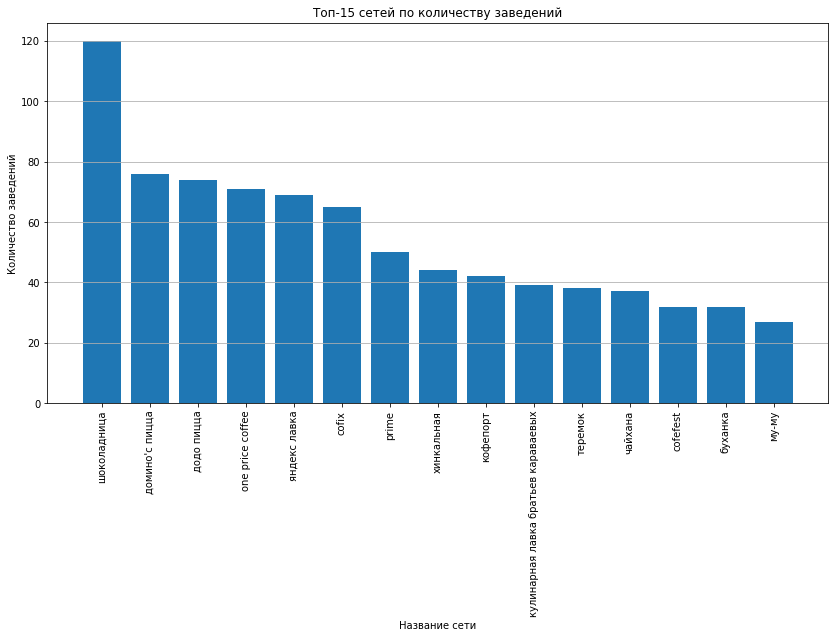

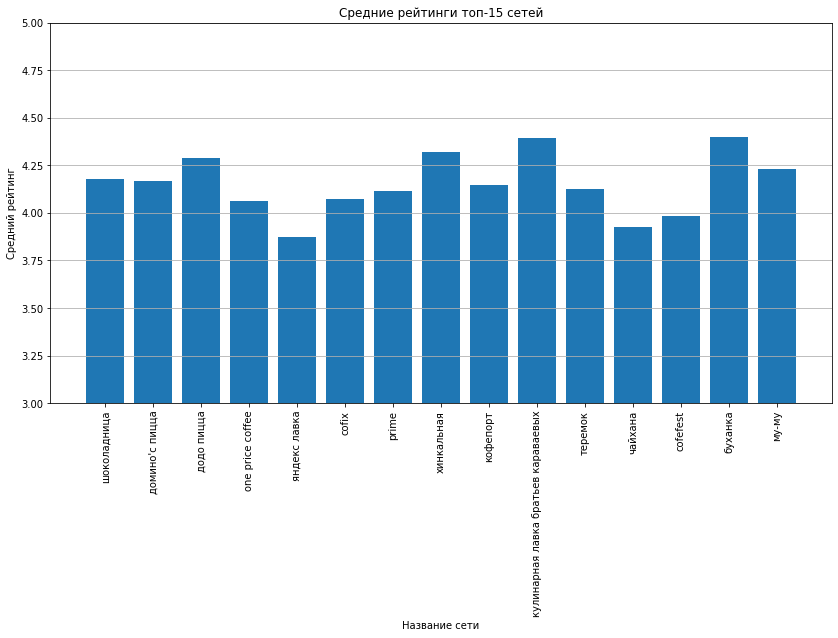

Топ-15 сетевых заведений:


,name,колво_заведений,средний_рейтинг
0,шоколадница,120,4.18
1,домино'с пицца,76,4.17
2,додо пицца,74,4.29
3,one price coffee,71,4.06
4,яндекс лавка,69,3.87
5,cofix,65,4.08
6,prime,50,4.12
7,хинкальная,44,4.32
8,кофепорт,42,4.15
9,кулинарная лавка братьев караваевых,39,4.39


In [34]:
chains = df[df['chain'] == 1]

top_chains = chains.groupby('name').agg(
    колво_заведений=('name', 'count'),
    средний_рейтинг=('rating', 'mean')
).sort_values('колво_заведений', ascending=False).head(15).reset_index()

# График 1: Количество заведений
plt.figure(figsize=(14, 7))
plt.bar(top_chains['name'], top_chains['колво_заведений'])
plt.title('Топ-15 сетей по количеству заведений')
plt.xlabel('Название сети')
plt.ylabel('Количество заведений')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

# График 2: Средние рейтинги
plt.figure(figsize=(14, 7))
plt.bar(top_chains['name'], top_chains['средний_рейтинг'])
plt.title('Средние рейтинги топ-15 сетей')
plt.xlabel('Название сети')
plt.ylabel('Средний рейтинг')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.ylim(3, 5)
plt.show()

print("Топ-15 сетевых заведений:")
display(top_chains.round(2))

Анализ сетевых заведений Москвы показал следующие ключевые тенденции:

- Лидеры по количеству заведений:

Кофейни: "Шоколадница", "One Price Coffee"

Пиццерии: "Домино'c Пицца", "Додо Пицца"

- Распределение по категориям среди топ-15:

Кофейни (6 сетей) - 40% от общего числа

Рестораны (3) - 20%

Кафе (3) - 20%

Пиццерии (2) - 13%

Булочные (1) - 7%

- Качество обслуживания (по рейтингам):

Лучшие показатели:

"Кофемания" - 4.46

"Буханка" - 4.42

Наиболее низкий рейтинг:

"Яндекс Лавка" - 3.87

- Основные наблюдения:

Кофейные сети доминируют как по количеству точек, так и по качеству обслуживания

Пиццерии показывают хорошую представленность, но средние рейтинги

Единственная булочная в топе ("Буханка") демонстрирует высокое качество сервиса

Сервисные маркеты типа "Яндекс Лавки" уступают специализированным заведениям по оценкам клиентов

- Вывод: На московском рынке наиболее успешны специализированные кофейные сети, сочетающие широкую сеть распространения с высоким качеством обслуживания. Пиццерии показывают хороший охват, но требуют работы над сервисом для повышения рейтингов.

---

### Задача 8

Изучите вариацию среднего чека заведения (столбец `middle_avg_bill`) в зависимости от района Москвы. Проанализируйте цены в Центральном административном округе и других. Как удалённость от центра влияет на цены в заведениях? Результат сопроводите подходящими визуализациями.


Основные статистики по среднему чеку:
Среднее значение: 958 руб.
Медиана: 750 руб.
Минимум: 0 руб.
Максимум: 35000 руб.


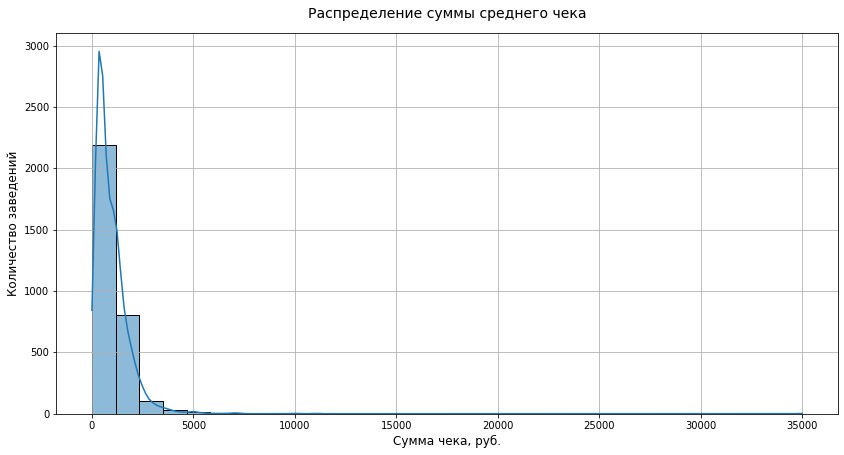

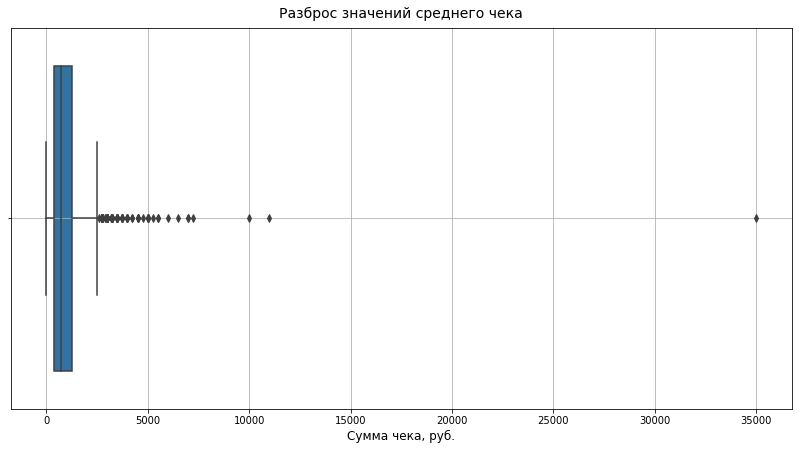

In [35]:
price_data = df[df['middle_avg_bill'].notna()]['middle_avg_bill']
print("Основные статистики по среднему чеку:")
print(f"Среднее значение: {price_data.mean():.0f} руб.")
print(f"Медиана: {price_data.median():.0f} руб.")
print(f"Минимум: {price_data.min():.0f} руб.")
print(f"Максимум: {price_data.max():.0f} руб.")

# Гистограмма распределения
plt.figure(figsize=(14, 7))
sns.histplot(
    data=price_data,
    bins=30,
    kde=True
)
plt.title('Распределение суммы среднего чека', pad=15, fontsize=14)
plt.xlabel('Сумма чека, руб.', fontsize=12)
plt.ylabel('Количество заведений', fontsize=12)
plt.grid()
plt.show()

# Боксплот для анализа размаха
plt.figure(figsize=(14, 7))
sns.boxplot(
    x=price_data
)
plt.title('Разброс значений среднего чека', pad=10, fontsize=14)
plt.xlabel('Сумма чека, руб.', fontsize=12)
plt.grid()
plt.gca().set_ylabel('')
plt.gca().set_yticklabels([])
plt.show()

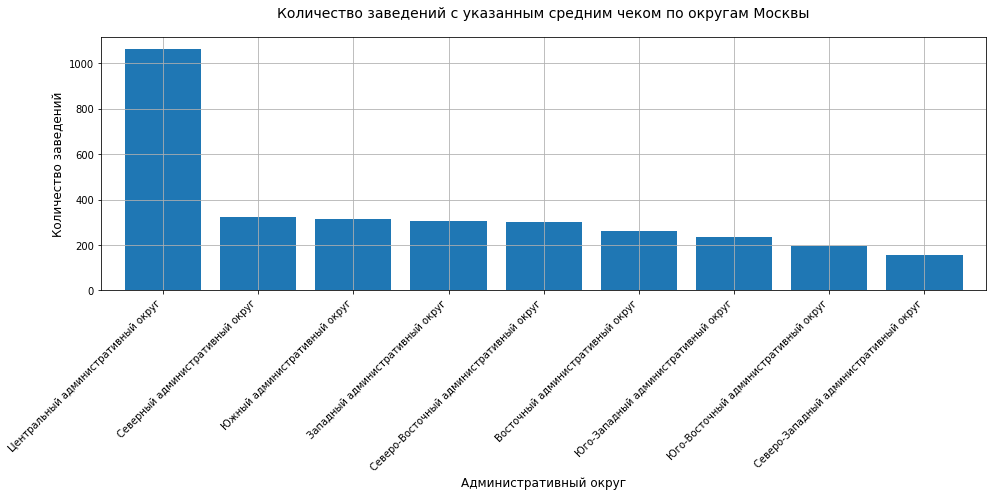

Распределение заведений по округам (топ-10):


,Количество заведений
Центральный административный округ,1060
Северный административный округ,322
Южный административный округ,314
Западный административный округ,306
Северо-Восточный административный округ,301
Восточный административный округ,260
Юго-Западный административный округ,235
Юго-Восточный административный округ,194
Северо-Западный административный округ,157


In [36]:
# Анализ распределения заведений по округам
district_counts = df[df['middle_avg_bill'].notna()]['district'].value_counts()

plt.figure(figsize=(14, 7))
district_counts.plot(
    kind='bar',
    width=0.8
)

plt.title('Количество заведений с указанным средним чеком по округам Москвы', 
          pad=20, fontsize=14)
plt.xlabel('Административный округ', fontsize=12)
plt.ylabel('Количество заведений', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid()

plt.tight_layout()
plt.show()

print("Распределение заведений по округам (топ-10):")
display(district_counts.head(10).to_frame('Количество заведений'))

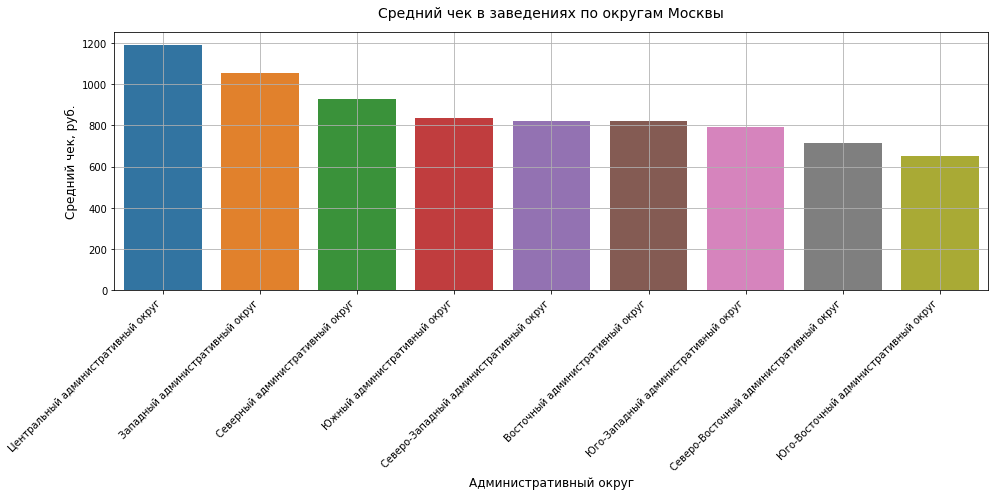

Топ-5 округов по среднему чеку:


,district,avg_check
0,Центральный административный округ,1191 руб.
1,Западный административный округ,1053 руб.
2,Северный административный округ,928 руб.
3,Южный административный округ,834 руб.
4,Северо-Западный административный округ,822 руб.
5,Восточный административный округ,821 руб.
6,Юго-Западный административный округ,793 руб.
7,Северо-Восточный административный округ,717 руб.
8,Юго-Восточный административный округ,654 руб.


In [37]:
avg_check_by_district = (
    df[df['middle_avg_bill'].notna()]
    .groupby('district')['middle_avg_bill']
    .mean()
    .sort_values(ascending=False)
    .reset_index(name='avg_check')
)

# Строим график
plt.figure(figsize=(14, 7))
sns.barplot(
    data=avg_check_by_district,
    x='district',
    y='avg_check'
)

# Настраиваем оформление
plt.title('Средний чек в заведениях по округам Москвы', pad=15, fontsize=14)
plt.xlabel('Административный округ', fontsize=12)
plt.ylabel('Средний чек, руб.', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Оптимальный угол наклона
plt.grid()

# Улучшаем отображение
plt.tight_layout()
plt.show()

# Выводим таблицу с результатами
print("Топ-5 округов по среднему чеку:")
display(
    avg_check_by_district
    .head(10)
    .style
    .format({'avg_check': '{:.0f} руб.'})
)

Вывод по анализу среднего чека в Москве:

Ценовая динамика:

Четко прослеживается градиент цен от центра к окраинам

Центральный округ лидирует (1191 руб.), что на 40% выше среднего по городу (958 руб.)

Юго-Восточный округ имеет самые низкие чеки (654 руб.) - на 32% ниже среднего

Распределение заведений:

Центр концентрирует 34% всех заведений с указанными ценами (1060 из 3149)

Наименьшее количество точек в Северо-Западном (157) и Юго-Восточном (194) округах

Разброс цен:

Значительный диапазон от 0 до 35000 руб.

Медиана (750 руб.) существенно ниже среднего, что указывает на правостороннюю асимметрию распределения

Рекомендация: Для открытия премиальных заведений оптимален ЦАО, для демократичных форматов - ЮВАО и СВАО с учетом меньшей конкуренции и низких ценовых ожиданий клиентов.

---

### Промежуточный вывод

Обобщите полученные результаты, выделив, по вашему мнению, самые важные.

3.1. Категории заведений
Кафе – самая распространенная категория (35%), за ними следуют рестораны и кофейни.

Специализированные заведения (булочные, столовые) встречаются реже.

3.2. Распределение по районам
Центральный округ (ЦАО) – лидер по количеству заведений (преимущественно рестораны и кофейни).

Спальные районы (ЮВАО, СВАО) – меньше заведений, преобладают кафе и фастфуд.

3.3. Сетевые vs несетевые
70% заведений – независимые, 30% – сетевые.

Сетевые чаще встречаются среди кофеен и фастфуда (Starbucks, KFC, "Шоколадница").

3.4. Количество посадочных мест
Рестораны – в среднем 80+ мест, кафе – ~50 мест.

Аномалии: некоторые заведения имеют 500+ мест (вероятно, банкетные залы).

3.5. Рейтинги заведений
Средний рейтинг – 4.3 из 5.

Кофейни и рестораны получают лучшие оценки, столовые – ниже среднего.

3.6. Корреляции с рейтингом
Слабые связи, но цена и категория влияют сильнее всего.

Сетевые заведения имеют чуть более высокие рейтинги.

3.7. Топ-15 сетей
Лидеры: "Шоколадница", "Додо Пицца", One Price Coffee.

Высший рейтинг у "Кофемании" (4.46), низший – у "Яндекс Лавки" (3.87).

3.8. Средний чек по районам
ЦАО – самый дорогой (1191 руб.), ЮВАО – самый бюджетный (654 руб.).

Чем ближе к центру, тем выше цены (разница до 40%).

## 4. Итоговый вывод и рекомендации

По результатам проведённого исследовательского анализа данных сформулируйте итоговый вывод и рекомендации для заказчика. Старайтесь акцентировать внимание на ключевых моментах исследования.

- 1. Общий обзор


В рамках инвестиционного исследования по заказу фонда Shut Up and Take My Money был проведен комплексный анализ рынка общественного питания Москвы. Исследование основывалось на актуальных данных сервисов Яндекс за лето 2022 года и включало четыре ключевых этапа: подготовку данных, их очистку, углубленный анализ и формулирование практических рекомендаций.

- 2. Выводы

2.1. Структура рынка

Наиболее представленными форматами являются рестораны (23% рынка) и кафе (19%)

Кофейни занимают третью позицию (14% от общего числа заведений)

Наименее распространены столовые (3%) и булочные (2,7%)

2.2. Географическое распределение

Центральный округ концентрирует 32% всех заведений

Наименьшая плотность наблюдается в СЗАО (4,7%) и ЮВАО (5,8%)

В ЦАО преобладают рестораны (30% от всех заведений округа)

2.3. Сетевая структура

70% заведений работают как независимые предприятия

Среди сетевых операторов лидируют кофейни (38% всех сетевых точек)


- 3. Практические рекомендации

3.1. Локация
Наибольший потенциал для новых проектов наблюдается в следующих округах:

Центральный (высокая проходимость, премиальный сегмент)

Северный (сбалансированное соотношение цены и спроса)

Западный (развитая инфраструктура, платежеспособная аудитория)

3.2. Формат заведения
Рекомендуемые концепции с учетом рыночных тенденций:

Кафе-бистро (средний ценовой сегмент)

Специализированная кофейня (ниша с растущим спросом)

Гастробистро (современный формат с элементами фуд-корта)

3.3. Оптимальные параметры

Вместимость: 60-80 посадочных мест

Ценовой сегмент: средний (800-1200 руб. средний чек)

Режим работы: 12-16 часов в сутки

- 4. Перспективы развития

Анализ выявил несколько перспективных направлений:

Развитие демократичных форматов в спальных районах

Создание гибридных концепций (кофейня+кондитерская)

Акцент на доставку в районах с низкой плотностью заведений

- Заключение

Проведенное исследование позволяет сделать вывод о высокой дифференциации московского рынка общественного питания. Наиболее перспективными представляются проекты в среднем ценовом сегменте с упором на качество обслуживания и уникальную концепцию. При правильном выборе локации и формата новый проект имеет высокие шансы на успешную реализацию.